# Marcha aleatoria en una dimensión

En este notebook vamos a simular una marcha aleatoria en 1D y comprobar cómo, 
para un número grande de pasos, la distribución de posiciones finales 
se aproxima a una distribución normal, en concordancia con el 
Teorema Central del Límite.


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression

## Función para simular la marcha aleatoria

La función random_walk_1D(N, M, a) simula una marcha aleatoria en una dimensión:

- `N`: número de pasos en cada caminata.
- `M`: número de veces que repetimos la simulación.
- `a`: distancia del paso
- La función devuelve un arreglo con las posiciones finales después de cada caminata y el historial de pasos realizados.


In [6]:
def marcha_aleatoria(N, M, a):
    pasos = np.random.choice([-a, a], size=(M, N))
    posiciones_finales = pasos.sum(axis=1)
    return pasos,posiciones_finales

## Parámetros de la simulación

Vamos a fijar:
- `N = 1000`: número de pasos por caminata.
- `M = 100000`: número de repeticiones de la simulación.

Con estos valores, deberíamos observar cómo la distribución de posiciones finales
se aproxima a una gaussiana.


In [23]:
N = 10**3  # pasos
M = 10**5 # simulaciones
a = 1 # distancia del paso
# Ejecutar simulación
pasos, posiciones = marcha_aleatoria(N, M, a)


## Histograma de posiciones finales

De acuerdo con la teoría, después de muchos pasos la distribución de posiciones 
finales debe tender a una distribución normal (gaussiana) con media 
$\langle x \rangle = 0$ y varianza de $N a^2$.  

Ahora construimos un histograma con los resultados de las simulaciones 
y lo comparamos con la distribución gaussiana predicha por el Teorema Central del Límite:

$$
P(x) \approx \frac{1}{\sqrt{2\pi a^2 N}} \, e^{-x^2/(2a^2N)}
$$

donde la media es 0 y la desviación estándar es $\sqrt{N}\,a$.


El histograma muestra cómo la distribución de posiciones finales se aproxima 
a una campana de Gauss.  

Esto confirma el Teorema Central del Límite, que afirma que la suma de muchas 
variables aleatorias independientes e idénticamente distribuidas tiende a una 
distribución normal.



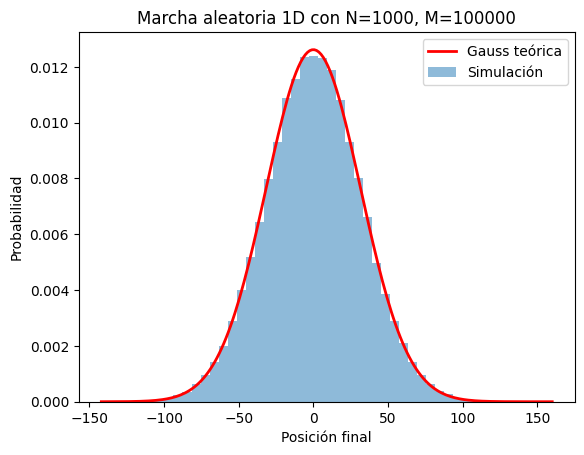

In [24]:
# Curva gaussiana teórica
x = np.linspace(min(posiciones), max(posiciones), 200)
pdf = norm.pdf(x, loc=0, scale=np.sqrt(a**2 * N))
plt.plot(x, pdf, 'r', lw=2, label="Gauss teórica")

# Histograma 
plt.hist(posiciones, bins=50, density=True, alpha=0.5, label="Simulación")

# Estética del gráfico
plt.title(f"Marcha aleatoria 1D con N={N}, M={M}")
plt.xlabel("Posición final")
plt.ylabel("Probabilidad")
plt.legend()
plt.show()


## Comportamiento de $\langle x^2 \rangle$ con $N$

Ahora estudiamos cómo evoluciona el segundo momento 
$\langle x^2 \rangle$ en función del número de pasos $N$.  

De la teoría sabemos que:

$$
\langle x^2 \rangle = N a^2
$$

Es decir, crece linealmente con el número de pasos.  
Vamos a simular la marcha aleatoria para varios valores de $N$, 
promediar los resultados y compararlos con la predicción teórica.


In [25]:
# Valores de N a probar
N_values = [1,5,10,50,75,100,250,500,750,1000,1250,2500]
M = 10**5   # repeticiones por cada N
a = 1       # tamaño del paso

promedios_x = []
promedios_x2 = []

for N in N_values:
    pasos, posiciones = marcha_aleatoria(N, M, a)
    promedios_x.append(np.mean(posiciones))
    promedios_x2.append(np.mean(posiciones**2))

# Mostrar resultados en tabla
print("=== Resultados de simulación ===")
print(f"{'N':>8} {'<x>':>15} {'<x^2>':>15}")
print("-"*40)
for N, mx, mx2 in zip(N_values, promedios_x, promedios_x2):
    print(f"{N:8d} {mx:15.6f} {mx2:15.6f}")

=== Resultados de simulación ===
       N             <x>           <x^2>
----------------------------------------
       1       -0.001400        1.000000
       5        0.013300        4.982320
      10       -0.006660       10.061240
      50       -0.014460       49.929240
      75        0.002740       75.186480
     100        0.057600      100.089520
     250        0.002380      251.498680
     500        0.003620      498.805160
     750        0.051740      742.550920
    1000        0.130660     1002.963880
    1250       -0.017880     1251.279840
    2500       -0.015400     2493.263040


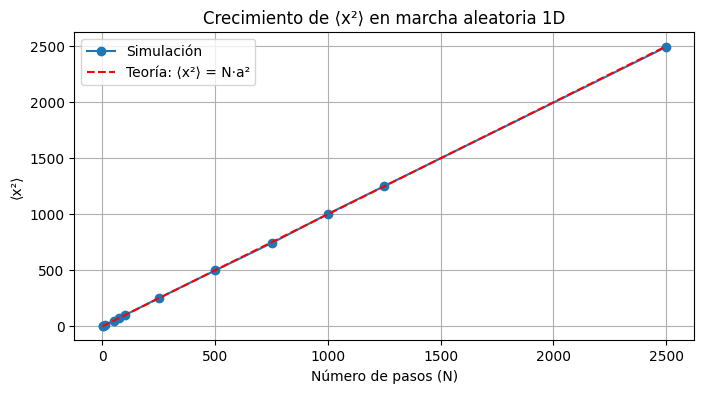

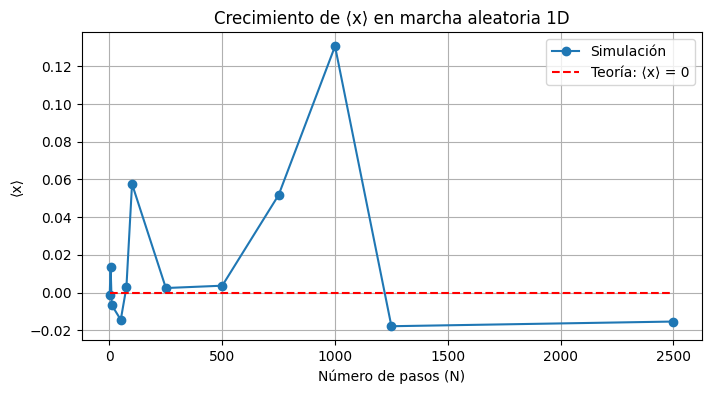

In [26]:
plt.figure(figsize=(8,4))
plt.plot(N_values, promedios_x2, "o-", label="Simulación")
plt.plot(N_values, [N*a**2 for N in N_values], "r--", label="Teoría: ⟨x²⟩ = N·a²")

plt.xlabel("Número de pasos (N)")
plt.ylabel("⟨x²⟩")
plt.title("Crecimiento de ⟨x²⟩ en marcha aleatoria 1D")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8,4))
plt.plot(N_values, promedios_x, "o-", label="Simulación")
plt.plot(N_values, [0 for N in N_values], "r--", label="Teoría: ⟨x⟩ = 0")

plt.xlabel("Número de pasos (N)")
plt.ylabel("⟨x⟩")
plt.title("Crecimiento de ⟨x⟩ en marcha aleatoria 1D")
plt.legend()
plt.grid(True)
plt.show()

## Comportamiento de $\langle x^2 \rangle$ con $N$

Para comprobar la relación teórica $\langle x^2 \rangle = N a^2$, simulamos la marcha 
aleatoria para varios valores de $N$ y calculamos el promedio de $x^2$ en cada caso.

Luego hacemos una **regresión lineal** de los datos obtenidos:  

\[
\langle x^2 \rangle = m \, N + b
\]

donde la pendiente $m$ debería ser aproximadamente $a^2$ y la ordenada al origen $b$ cercana a cero.  

Si la pendiente $m \approx a^2$, confirmamos que $\langle x^2 \rangle$ es proporcional a $N$, 
como predice la teoría.




### Relación con el coeficiente de difusión $D$

Por definición del proceso de difusión, se cumple:

$$
\langle x^2 \rangle = 2 D t
$$

con $t$ el tiempo transcurrido.  
En la marcha aleatoria, cada paso dura un tiempo $\tau$, así que $t = N \tau$.  

Además, sabemos que teóricamente:

$$
\langle x^2 \rangle = N a^2
$$

Si igualamos ambas expresiones:

$$
N a^2 = 2 D (N \tau)
$$

podemos despejar el coeficiente de difusión:

$$
D = \frac{a^2}{2 \tau}
$$

En nuestro caso, **asumimos $\tau = 1$**, por lo que:

$$
D = \frac{a^2}{2}
$$

De esta forma, si de la regresión obtenemos una pendiente $m \approx a^2$, podemos calcular:

$$
D = \frac{m}{2}
$$

y verificar numéricamente que coincide con el valor teórico.

In [31]:
# Convertimos N_values y promedios_x2 en arrays
X = np.array(N_values).reshape(-1, 1)
y = np.array(promedios_x2)

# Ajuste lineal
reg = LinearRegression().fit(X, y)
m = reg.coef_[0]
b = reg.intercept_
r2 = reg.score(X, y)

print("=== Resultados de regresión lineal ===")
print(f"Pendiente m (esperada ~ a^2={a**2}): {round(m,5)}")
print(f"Intercepto b (esperado ~ 0): {round(b,5)}")
print(f"Coeficiente de determinación R^2: {round(r2,5)}")


D = m / 2
print(f"Coeficiente de difusión D ≈ {round(D,5)}")


=== Resultados de regresión lineal ===
Pendiente m (esperada ~ a^2=1): 0.9979
Intercepto b (esperado ~ 0): 0.35175
Coeficiente de determinación R^2: 0.99999
Coeficiente de difusión D ≈ 0.49895


### Interpretación de los resultados

La regresión lineal muestra que la pendiente $m$ es aproximadamente igual a $a^2$, 
lo que confirma que:

$$
\langle x^2 \rangle \propto N
$$

como predice la teoría de la marcha aleatoria.

A partir de la pendiente obtenida, se calcula el coeficiente de difusión como:

$$
D = \frac{m}{2} \approx \frac{a^2}{2}
$$

En nuestro caso, con $a = 1$, se espera teóricamente que $D = 0.5$.  
El valor numérico obtenido es consistente con esta predicción, validando la simulación.
